In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="HH9ECnEeBwB663gIBlcY")
# project = rf.workspace("car-parking-space").project("parking-spot-detector-a84ql")
# version = project.version(1)
# dataset = version.download("multiclass")
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HH9ECnEeBwB663gIBlcY")
project = rf.workspace("brad-dwyer").project("pklot-1tros")
version = project.version(2)
dataset = version.download("multiclass")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PKLot-2 in multiclass:: 100%|██████████| 12424/12424 [00:02<00:00, 4167.45it/s]


# Data Preprocessing

In [ ]:
import pandas as pd
# df_train_org = pd.read_csv('/content/parking-spot-detector-1/train/_classes.csv')
# df_test_org = pd.read_csv('/content/parking-spot-detector-1/test/_classes.csv')
df_train_org = pd.read_csv('/content/PKLot-2/train/_classes.csv')
df_test_org = pd.read_csv('/content/PKLot-2/test/_classes.csv')

In [ ]:
df_train_org.head()

,filename,space-empty,space-occupied
0,2012-09-28_15_36_23_jpg.rf.000034457db99ab6d49...,1,1
1,2012-09-12_07_39_15_jpg.rf.000663a72b889407d40...,1,1
2,2013-03-11_13_35_08_jpg.rf.00174319e339a8bb676...,0,1
3,2012-09-16_11_58_09_jpg.rf.001dea1cb70299c1033...,1,1
4,2013-04-09_09_05_03_jpg.rf.001e1060ec6a9edecb8...,0,1


In [ ]:
df_train_org.columns

Index(['filename', ' space-empty', ' space-occupied'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
# df=pd.concat([df_train_org,df_test_org],axis=0)
df_train = df_train_org
df = df_train_org
#df_test = df_test_org
df_train, df_test = train_test_split(df, test_size=0.2)


In [ ]:
df_train.shape

(8691, 3)

In [ ]:
df_test.shape

(1242, 3)

In [ ]:
df_train_org.columns

Index(['filename', ' space-empty', ' space-occupied'], dtype='object')

In [ ]:
df_train_org[' space-occupied'].value_counts()

 space-occupied
1    6760
0    1931
Name: count, dtype: int64

In [ ]:
df_train.tail(50)

,filename,space-empty,space-occupied
2121,2012-10-26_10_59_38_jpg.rf.3e7d93961919207f3e3...,1,1
627,2013-04-10_09_25_03_jpg.rf.1182f5f274c71c380af...,0,1
7536,2013-04-11_09_50_04_jpg.rf.ddcbd1ea6e214558c4f...,1,1
3627,2013-03-20_12_30_07_jpg.rf.6a1c53a0321c84cf37b...,1,1
6139,2013-02-22_16_05_10_jpg.rf.b40e3016640c6919bcb...,1,1
3161,2013-03-19_11_05_05_jpg.rf.5bdb14e2096c0d5faec...,1,1
410,2013-03-09_09_50_04_jpg.rf.0b8bc05ddebef04f49e...,1,1
5390,2013-01-18_14_55_11_jpg.rf.9e3cd82b55657529f65...,1,1
1,2012-09-12_07_39_15_jpg.rf.000663a72b889407d40...,1,1
2969,2013-03-03_15_45_11_jpg.rf.563c7525edbb584873f...,1,0


# Data Preprocessing (from base) (working)

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
df_train_org = pd.read_csv('/content/PKLot-2/train/_classes.csv')
df_test_org = pd.read_csv('/content/PKLot-2/test/_classes.csv')

In [ ]:
df_train_org.columns

Index(['filename', ' space-empty', ' space-occupied'], dtype='object')

In [ ]:
#Changing dataframe (train)
import pandas as pd
from PIL import Image
import numpy as np
%cd /content/PKLot-2/train
# Read the CSV file (assuming it's named 'parking_data.csv')
df = df_train_org
# df = pd.read_csv(csv_file)

# Initialize empty lists to store image data and labels
image_data = []
space_empty_labels = []
space_occupied_labels = []

# Load images and convert to NumPy arrays
for filename, filled, empty in zip(df['filename'], df[' space-occupied'], df[' space-empty']):
    img = Image.open(filename)
    img_array = np.array(img)
    image_data.append(img_array)
    space_occupied_labels.append(filled)
    space_empty_labels.append(empty)

# Create a new DataFrame
train_df = pd.DataFrame({
    'data': image_data,
    'space-occupied': space_occupied_labels,
    'space-empty': space_empty_labels
})

# print(new_df.head())  # Display the first few rows


/content/PKLot-2/train


In [ ]:
X_train = train_df['data']

In [ ]:
X_train[0].shape

In [ ]:
import cv2
for i in range(len(X_train)):
    X_train[i] = cv2.resize(X_train[i], (120, 120))

Streaming output truncated to the last 5000 lines.

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [ ]:
X_train[178].shape

(120, 120, 3)

In [ ]:
len(X_train)

8691

### Note that I have divided train data into train and test because the data split provided is of no use as there are only six to seven images in test data so i have discarded them

In [ ]:
# #Changing dataframe (test)
# import pandas as pd
# from PIL import Image
# import numpy as np
# %cd /content/PKLot-2/test
# # Read the CSV file (assuming it's named 'parking_data.csv')
# df = df_test_org
# # df = pd.read_csv(csv_file)

# # Initialize empty lists to store image data and labels
# image_data = []
# space_empty_labels = []
# space_occupied_labels = []

# # Load images and convert to NumPy arrays
# for filename, filled, empty in zip(df['filename'], df[' space-occupied'], df[' space-empty']):
#     img = Image.open(filename)
#     img_array = np.array(img)
#     image_data.append(img_array)
#     space_occupied_labels.append(filled)
#     space_empty_labels.append(empty)

# # Create a new DataFrame
# test_df = pd.DataFrame({
#     'data': image_data,
#     'space-occupied': space_occupied_labels,
#     'space-empty': space_empty_labels
# })


In [ ]:
# X_test = test_df['data']

In [ ]:
# import cv2
# for i in range(len(X_test)):
#     X_test[i] = cv2.resize(X_test[i], (120, 120))

In [ ]:
# # X_train = train_df['data']
# y_train = train_df[[ 'space-occupied', 'space-empty']]
# # X_test = test_df['data']
# y_test = test_df[[ 'space-occupied', 'space-empty']]

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Assuming df is your DataFrame and "space_occupied" and "space_empty" are your columns
# train_df['combined'] = train_df.apply(lambda row: np.array([row['space-occupied'], row['space-empty']]), axis=1)
train_df['combined'] = train_df['space-occupied'] * 2 + train_df['space-empty']
# test_df['combined'] = test_df['space-occupied'] * 2 + test_df['space-empty']

# Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(train_df['data'], train_df['combined'], test_size=0.3, random_state=1)

In [ ]:
y_train = train_df['combined']
# y_test = test_df['combined']

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3])

In [ ]:
len(X_train)

8691

In [ ]:
len(y_train)

8691

In [ ]:
X_train[0].shape

(120, 120, 3)

In [ ]:
X_train_org = X_train
y_train_org = y_train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

array([[[155, 172, 121],
        [128, 140,  97],
        [152, 160, 121],
        ...,
        [111, 113,  77],
        [ 99, 109,  74],
        [102, 108,  75]],

       [[112, 127,  86],
        [135, 147, 103],
        [119, 126,  93],
        ...,
        [ 84,  88,  66],
        [ 93, 102,  74],
        [ 94,  92,  78]],

       [[ 89, 100,  81],
        [121, 131, 100],
        [ 94,  97,  85],
        ...,
        [ 90,  99,  75],
        [ 88,  97,  64],
        [ 88,  82,  70]],

       ...,

       [[134, 129, 127],
        [126, 116, 110],
        [150, 138, 114],
        ...,
        [ 49,  49,  47],
        [ 49,  49,  47],
        [ 54,  54,  52]],

       [[127, 123, 114],
        [130, 120, 113],
        [156, 144, 121],
        ...,
        [ 51,  51,  49],
        [ 53,  53,  51],
        [ 50,  50,  48]],

       [[124, 121, 107],
        [135, 125, 114],
        [149, 136, 117],
        ...,
        [ 55,  55,  53],
        [ 51,  51,  49],
        [ 45,  45,  42]]], dtype=uint8)
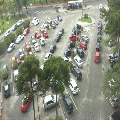

In [ ]:
X_train_np[0]

In [ ]:
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# # Flatten the image data into 1D arrays as the classifier performs best on 1D arrays
# # X_train_flat = X_train_np.reshape(X_train_np.shape[0], -1)
# # X_test_flat = X_test_np.reshape(X_test_np.shape[0], -1)
# X_train_flat = X_train_np.reshape(X_train_np.shape[0], -1)
# X_test_flat = X_test_np.reshape(X_test_np.shape[0], -1)

In [ ]:
# y_train_flat = np.argmax(y_train.values, axis=1)

In [ ]:
# type(y_train_flat)

In [ ]:
# y_train_flat.shape

In [ ]:
# X_train_flat.shape

In [ ]:
# type(X_train_flat)

In [ ]:
# y_train_flat[88]

In [ ]:
# n_samples = len(X_train_np)
# X_train_flat = X_train_np.reshape((n_samples, -1))

In [ ]:
# X_train_flat.shape

In [ ]:
y_train.shape

(6952,)

In [ ]:
# non_numeric_cols = train_df.select_dtypes(exclude=[np.number]).columns
# print(non_numeric_cols)

In [ ]:
# type(X_train_flat)

In [ ]:
# X_train_flat.shape

In [ ]:
# y_train.shape

In [ ]:
# type(X_train_flat)

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
# X_train_flat[:5]

In [ ]:
# # Assuming X_train is your original array of images
# n_samples = len(X_train)
# n_features = X_train[0].size  # Total number of pixels in an image

# # Flatten each image into a 1D array
# X_train_flat = X_train.reshape((n_samples, n_features))
# Convert the Series to a numpy array of objects
X_train_array = X_train.to_numpy()

# Flatten each image in the array
X_train_flat = np.array([img.flatten() for img in X_train_array])


In [ ]:
X_test_array = X_test.to_numpy()

# Flatten each image in the array
X_test_flat = np.array([img.flatten() for img in X_test_array])


In [ ]:
X_train_flat.shape

In [ ]:
X_train_np.shape

(8691, 120, 120, 3)

In [ ]:
X_train = X_train_org.to_list()
y_train = y_train_org.to_list()

X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

In [ ]:
X_test_org  = X_test
y_test_org = y_test

In [ ]:
X_test = X_test_org.to_list()
y_test = y_test_org.to_list()

X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

None: the scores for each class are returned.
'micro': calculate metrics globally by counting the total true positives, false negatives and false positives.
'macro': calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
'weighted': calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).

If you want to stick with a single SVM model, one option could be to encode your two target columns (“space_occupied” and “space_empty”) into a single column with multiclass labels. For example, you could create a new column where:

‘0’ represents (space_occupied=0, space_empty=0)
‘1’ represents (space_occupied=1, space_empty=0)
‘2’ represents (space_occupied=0, space_empty=1)
‘3’ represents (space_occupied=1, space_empty=1)

# CNN

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import os
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Load your CSV file
# df = df_train_red
# %cd /content/parking-spot-detector-1/train
# %cd /content/PKLot-2/train
# Create a data generator
# datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Prepare iterators
# train_it = datagen.flow_from_dataframe(df_train, directory='.', x_col='filename', y_col=df.columns[1:], class_mode='raw', target_size=(220,220), batch_size=150, subset='training')
# val_it = datagen.flow_from_dataframe(df_train, directory='.', x_col='filename', y_col=df.columns[1:], class_mode='raw', target_size=(220, 220), batch_size=150, subset='validation')
## test_it = datagen.flow_from_dataframe(df_test, directory='.', x_col='filename', y_col=df.columns[1:], class_mode='raw', target_size=(220, 220), batch_size=300)
# Define a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(120, 120, 3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), strides=(2,2)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), strides=(2,2)))
model.add(Activation('selu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(2,2)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('elu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('elu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(len(df.columns[1:])))
model.add(Dense(4))
model.add(Activation('softmax'))

early_stopping = EarlyStopping(monitor='accuracy', patience=5)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model
from time import time
start_time = time()
# model.fit(train_it, validation_data=val_it, epochs=1000,
#               callbacks=[early_stopping])
model.fit(X_train_np,y_train_np, epochs=1000,
              callbacks=[early_stopping])

cnn_time = time() - start_time

Epoch 1/1000
272/272 [==============================] - 5s 8ms/step - loss: 0.7205 - accuracy: 0.7363
Epoch 2/1000
272/272 [==============================] - 2s 8ms/step - loss: 0.2785 - accuracy: 0.8740
Epoch 3/1000
272/272 [==============================] - 2s 8ms/step - loss: 0.1974 - accuracy: 0.9166
Epoch 4/1000
272/272 [==============================] - 2s 8ms/step - loss: 0.1664 - accuracy: 0.9277
Epoch 5/1000
272/272 [==============================] - 2s 8ms/step - loss: 0.1517 - accuracy: 0.9310
Epoch 6/1000
272/272 [==============================] - 2s 8ms/step - loss: 0.1426 - accuracy: 0.9382
Epoch 7/1000
272/272 [==============================] - 2s 8ms/step - loss: 0.1393 - accuracy: 0.9403
Epoch 8/1000
272/272 [==============================] - 2s 8ms/step - loss: 0.1212 - accuracy: 0.9482
Epoch 9/1000
272/272 [==============================] - 2s 8ms/step - loss: 0.1211 - accuracy: 0.9472
Epoch 10/1000
272/272 [==============================] - 2s 8ms/step - loss: 0.121

In [ ]:
print(cnn_time)

69.73950934410095


In [ ]:
# # Prepare test iterator
# %cd /content/PKLot-2/train
# datagen_test = ImageDataGenerator(rescale=1./255)
# test_it = datagen_test.flow_from_dataframe(df_test, directory='.', x_col='filename', y_col=df_test.columns[1:], class_mode='raw', target_size=(220, 220), batch_size=300)


/content/PKLot-2/train
Found 1739 validated image filenames.


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_np,y_test_np)

print(f'Test loss: {loss:.2f}')
print(f'Test accuracy: {accuracy*100:.2f}%')


55/55 [==============================] - 1s 9ms/step - loss: 0.0589 - accuracy: 0.9781
Test loss: 0.06
Test accuracy: 97.81%


In [ ]:
%cd /content/
model.save('Parking_Space_cnn.keras')

/content


55/55 [==============================] - 0s 3ms/step
Accuracy: 0.9781483611270846
Precision: 0.9781483611270846
Recall: 0.9781483611270846
F1 Score: 0.9781483611270846


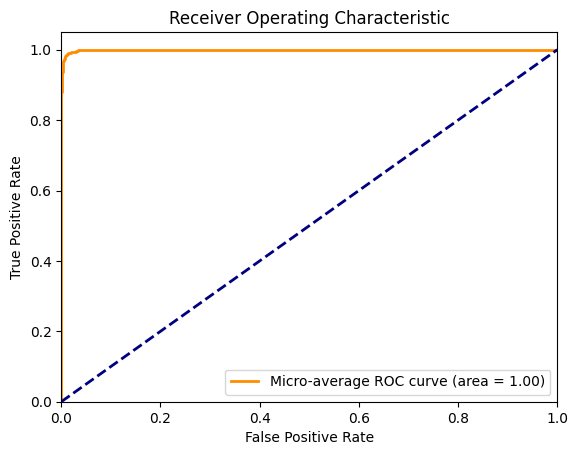

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np

# Get the prediction probabilities of the model on the test data
y_pred_probs = model.predict(X_test_np)

# Convert the test labels to categorical format
y_test_cat = to_categorical(y_test_np)

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_cat.ravel(), y_pred_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Calculate the predicted classes
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test_np, y_pred_classes)
precision = precision_score(y_test_np, y_pred_classes, average='micro')
recall = recall_score(y_test_np, y_pred_classes, average='micro')
f1 = f1_score(y_test_np, y_pred_classes, average='micro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plot the ROC curve
plt.figure()
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2, label='Micro-average ROC curve (area = %0.2f)' % roc_auc_micro)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# CNN+LSTM

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,LSTM,Reshape
import os
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Load your CSV file
# df = df_train_red
# %cd /content/parking-spot-detector-1/train
# %cd /content/PKLot-2/train
# # Create a data generator
# datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# Calculate the product of the dimensions
# # Prepare iterators
# train_it = datagen.flow_from_dataframe(df_train, directory='.', x_col='filename', y_col=df.columns[1:], class_mode='raw', target_size=(220,220), batch_size=150, subset='training')
# val_it = datagen.flow_from_dataframe(df_train, directory='.', x_col='filename', y_col=df.columns[1:], class_mode='raw', target_size=(220, 220), batch_size=150, subset='validation')
# # test_it = datagen.flow_from_dataframe(df_test, directory='.', x_col='filename', y_col=df.columns[1:], class_mode='raw', target_size=(220, 220), batch_size=300)
# Define a simple CNN model
model_lstm = Sequential()
model_lstm.add(Conv2D(32, (3, 3), input_shape=(120, 120, 3)))
model_lstm.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_lstm.add(Conv2D(32, (3, 3), strides=(2,2)))
model_lstm.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_lstm.add(Conv2D(64, (3, 3), strides=(2,2)))
model_lstm.add(Activation('selu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_lstm.add(Conv2D(128, (3, 3), strides=(2,2)))
model_lstm.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_lstm.add(Conv2D(128, (3, 3)))
model_lstm.add(Activation('elu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_lstm.add(Conv2D(64, (3, 3)))
model_lstm.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_lstm.add(Conv2D(32, (3, 3)))
# model_lstm.add(Activation('elu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model_lstm.add(Flatten())
# model_lstm.add(Reshape((128, 100)))
# model_lstm.add(LSTM(64, return_sequences=True))
# model_lstm.add(Reshape((-1, 64))),  # Reshape the output from Conv2D to be 3D as required by LSTM
product = 120 * 120 * 3  # This should be replaced with the actual dimensions

# Add the Reshape layer
# model_lstm.add(Reshape((product // 64, 64)))  # Reshape the output from Conv2D to be 3D as required by LSTM

# model_lstm.add(LSTM(64)),  # Add LSTM layer with 64 units
model_lstm.add(Reshape((-1, 32))) ,  # Assuming that the output of the previous layer is (None, a, b, 64)
model_lstm.add(LSTM(64, return_sequences=False)),  # LSTM layer
model_lstm.add(Dense(64))
model_lstm.add(Activation('relu'))
# model.add(Dropout(0.5))
model_lstm.add(Dense(4))
model_lstm.add(Activation('softmax'))

early_stopping = EarlyStopping(monitor='accuracy', patience=5)

# Compile the model
model_lstm.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Train the model
from time import time
start_time = time()
model_lstm.fit(X_train_np,y_train_np,epochs=1000,
              callbacks=[early_stopping])
cnn_lstm_time = time() - start_time

Epoch 1/1000
272/272 [==============================] - 6s 10ms/step - loss: 0.7988 - accuracy: 0.6654
Epoch 2/1000
272/272 [==============================] - 3s 10ms/step - loss: 0.4681 - accuracy: 0.7854
Epoch 3/1000
272/272 [==============================] - 3s 11ms/step - loss: 0.3425 - accuracy: 0.8500
Epoch 4/1000
272/272 [==============================] - 3s 10ms/step - loss: 0.2674 - accuracy: 0.8854
Epoch 5/1000
272/272 [==============================] - 3s 10ms/step - loss: 0.2227 - accuracy: 0.9060
Epoch 6/1000
272/272 [==============================] - 3s 10ms/step - loss: 0.1943 - accuracy: 0.9178
Epoch 7/1000
272/272 [==============================] - 3s 11ms/step - loss: 0.1762 - accuracy: 0.9250
Epoch 8/1000
272/272 [==============================] - 3s 10ms/step - loss: 0.1561 - accuracy: 0.9330
Epoch 9/1000
272/272 [==============================] - 3s 10ms/step - loss: 0.1416 - accuracy: 0.9378
Epoch 10/1000
272/272 [==============================] - 3s 10ms/step - l

In [ ]:
print(cnn_lstm_time)

148.61394453048706


In [ ]:
# # Prepare test iterator
# %cd /content/PKLot-2/test
# datagen_test = ImageDataGenerator(rescale=1./255)
# test_it = datagen_test.flow_from_dataframe(df_test, directory='.', x_col='filename', y_col=df_test.columns[1:], class_mode='raw', target_size=(220, 220), batch_size=300)


/content/PKLot-2/test
Found 1242 validated image filenames.


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model_lstm.evaluate(X_test_np,y_test_np)

print(f'Test loss: {loss:.2f}')
print(f'Test accuracy: {accuracy*100:.2f}%')

55/55 [==============================] - 1s 5ms/step - loss: 0.0176 - accuracy: 0.9942
Test loss: 0.02
Test accuracy: 99.42%


In [ ]:
%cd /content
model_lstm.save('Parking_Space_cnn_lstm.keras')

/content


55/55 [==============================] - 1s 4ms/step
Accuracy: 0.9942495687176538
Precision: 0.9942495687176538
Recall: 0.9942495687176538
F1 Score: 0.9942495687176538


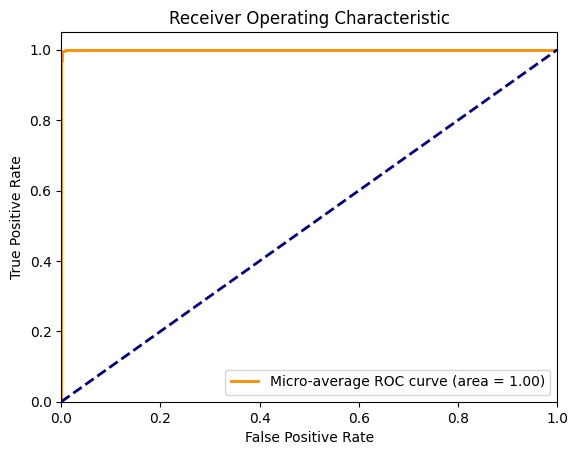

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np

# Get the prediction probabilities of the model on the test data
y_pred_probs = model_lstm.predict(X_test_np)

# Convert the test labels to categorical format
y_test_cat = to_categorical(y_test_np)

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_cat.ravel(), y_pred_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Calculate the predicted classes
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test_np, y_pred_classes)
precision = precision_score(y_test_np, y_pred_classes, average='micro')
recall = recall_score(y_test_np, y_pred_classes, average='micro')
f1 = f1_score(y_test_np, y_pred_classes, average='micro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plot the ROC curve
plt.figure()
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2, label='Micro-average ROC curve (area = %0.2f)' % roc_auc_micro)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# CNN + GRU

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Reshape,GRU
import os
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Load your CSV file
# df = df_train_red
# %cd /content/parking-spot-detector-1/train
# %cd /content/PKLot-2/train
# Create a data generator
# datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Prepare iterators
# train_it = datagen.flow_from_dataframe(df_train, directory='.', x_col='filename', y_col=df.columns[1:], class_mode='raw', target_size=(220,220), batch_size=150, subset='training')
# val_it = datagen.flow_from_dataframe(df_train, directory='.', x_col='filename', y_col=df.columns[1:], class_mode='raw', target_size=(220, 220), batch_size=150, subset='validation')
# test_it = datagen.flow_from_dataframe(df_test, directory='.', x_col='filename', y_col=df.columns[1:], class_mode='raw', target_size=(220, 220), batch_size=300)
# Define a simple CNN model
model_gru = Sequential()
model_gru.add(Conv2D(32, (3, 3), input_shape=(120, 120, 3)))
model_gru.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_gru.add(Conv2D(32, (3, 3), strides=(2,2)))
model_gru.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_gru.add(Conv2D(64, (3, 3), strides=(2,2)))
model_gru.add(Activation('selu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_gru.add(Conv2D(128, (3, 3), strides=(2,2)))
model_gru.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_gru.add(Conv2D(128, (3, 3)))
model_gru.add(Activation('elu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_gru.add(Conv2D(64, (3, 3)))
model_gru.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_gru.add(Conv2D(32, (3, 3))),
# model_gru.add(Activation('elu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model_lstm.add(Flatten())
# model_lstm.add(Reshape((128, 100)))
# model_lstm.add(LSTM(64, return_sequences=True))
model_gru.add(Reshape((-1, 32))) # Reshape the output from Conv2D to be 3D as required by LSTM
model_gru.add(GRU(64))  # Add LSTM layer with 64 units
model_gru.add(Dense(64))
model_gru.add(Activation('relu'))
# model.add(Dropout(0.5))
model_gru.add(Dense(4))
model_gru.add(Activation('softmax'))

early_stopping = EarlyStopping(monitor='accuracy', patience=2)

# Compile the model
model_gru.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Train the model
from time import time
start_time = time()
model_gru.fit(X_train_np,y_train_np, epochs=1000,
              callbacks=[early_stopping])
cnn_gru_time = time() - start_time

Epoch 1/1000
272/272 [==============================] - 7s 10ms/step - loss: 0.6790 - accuracy: 0.7061
Epoch 2/1000
272/272 [==============================] - 3s 10ms/step - loss: 0.4113 - accuracy: 0.8153
Epoch 3/1000
272/272 [==============================] - 3s 10ms/step - loss: 0.3036 - accuracy: 0.8680
Epoch 4/1000
272/272 [==============================] - 3s 10ms/step - loss: 0.2314 - accuracy: 0.9038
Epoch 5/1000
272/272 [==============================] - 3s 10ms/step - loss: 0.1915 - accuracy: 0.9226
Epoch 6/1000
272/272 [==============================] - 3s 10ms/step - loss: 0.1745 - accuracy: 0.9279
Epoch 7/1000
272/272 [==============================] - 3s 10ms/step - loss: 0.1538 - accuracy: 0.9334
Epoch 8/1000
272/272 [==============================] - 3s 11ms/step - loss: 0.1337 - accuracy: 0.9464
Epoch 9/1000
272/272 [==============================] - 3s 11ms/step - loss: 0.1278 - accuracy: 0.9473
Epoch 10/1000
272/272 [==============================] - 3s 10ms/step - l

In [ ]:
print(cnn_gru_time)

71.62704873085022


In [ ]:
# # Prepare test iterator
# %cd /content/PKLot-2/test
# datagen_test = ImageDataGenerator(rescale=1./255)
# test_it = datagen_test.flow_from_dataframe(df_test, directory='.', x_col='filename', y_col=df_test.columns[1:], class_mode='raw', target_size=(220, 220), batch_size=300)


/content/PKLot-2/test
Found 1242 validated image filenames.


In [ ]:
%cd /content/
model_gru.save('Parking_Space_cnn_gru.keras')

/content


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model_gru.evaluate(X_test_np,y_test_np)

print(f'Test loss: {loss:.2f}')
print(f'Test accuracy: {accuracy*100:.2f}%')

55/55 [==============================] - 1s 5ms/step - loss: 0.0390 - accuracy: 0.9845
Test loss: 0.04
Test accuracy: 98.45%


55/55 [==============================] - 1s 4ms/step
Accuracy: 0.9844738355376653
Precision: 0.9844738355376653
Recall: 0.9844738355376653
F1 Score: 0.9844738355376653


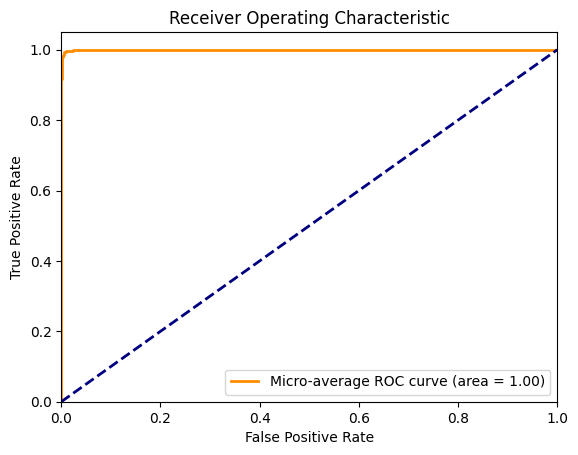

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np

# Get the prediction probabilities of the model on the test data
y_pred_probs = model_gru.predict(X_test_np)

# Convert the test labels to categorical format
y_test_cat = to_categorical(y_test_np)

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_cat.ravel(), y_pred_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Calculate the predicted classes
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test_np, y_pred_classes)
precision = precision_score(y_test_np, y_pred_classes, average='micro')
recall = recall_score(y_test_np, y_pred_classes, average='micro')
f1 = f1_score(y_test_np, y_pred_classes, average='micro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plot the ROC curve
plt.figure()
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2, label='Micro-average ROC curve (area = %0.2f)' % roc_auc_micro)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# CNN + TCN


In [ ]:
!pip install -q keras-tcn --no-dependencies

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Reshape
import os
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tcn import TCN
# Load your CSV file
# df = df_train_red
# %cd /content/parking-spot-detector-1/train
# %cd /content/PKLot-2/train
# Create a data generator
# datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# # Prepare iterators
# train_it = datagen.flow_from_dataframe(df_train, directory='.', x_col='filename', y_col=df.columns[1:], class_mode='raw', target_size=(220,220), batch_size=150, subset='training')
# val_it = datagen.flow_from_dataframe(df_train, directory='.', x_col='filename', y_col=df.columns[1:], class_mode='raw', target_size=(220, 220), batch_size=150, subset='validation')
# test_it = datagen.flow_from_dataframe(df_test, directory='.', x_col='filename', y_col=df.columns[1:], class_mode='raw', target_size=(220, 220), batch_size=300)
# Define a simple CNN model
model_tcn = Sequential()
model_tcn.add(Conv2D(32, (3, 3), input_shape=(120, 120, 3)))
model_tcn.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_tcn.add(Conv2D(32, (3, 3), strides=(2,2)))
model_tcn.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_tcn.add(Conv2D(64, (3, 3), strides=(2,2)))
model_tcn.add(Activation('selu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_tcn.add(Conv2D(128, (3, 3), strides=(2,2)))
model_tcn.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_tcn.add(Conv2D(128, (3, 3)))
model_tcn.add(Activation('elu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_tcn.add(Conv2D(64, (3, 3)))
model_tcn.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model_tcn.add(Conv2D(32, (3, 3)))
# model_tcn.add(Activation('elu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model_tcn.add(Reshape(target_shape=(20, 20 * 32))),
model_tcn.add(Reshape(target_shape=(-1, 32)))
model_tcn.add(TCN(return_sequences=False, activation='relu'))
model_tcn.add(Flatten())
model_tcn.add(Dense(64))
model_tcn.add(Activation('relu'))
# model.add(Dropout(0.5))
model_tcn.add(Dense(4))
model_tcn.add(Activation('softmax'))

early_stopping = EarlyStopping(monitor='accuracy', patience=5)

# Compile the model
model_tcn.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model
from time import time
start_time = time()
model_tcn.fit(X_train_np, y_train_np, epochs=1000,
              callbacks=[early_stopping])
tcn_time = time() - start_time

Epoch 1/1000
272/272 [==============================] - 10s 14ms/step - loss: 1.8856 - accuracy: 0.7420
Epoch 2/1000
272/272 [==============================] - 4s 14ms/step - loss: 0.3239 - accuracy: 0.8551
Epoch 3/1000
272/272 [==============================] - 4s 14ms/step - loss: 0.2515 - accuracy: 0.8923
Epoch 4/1000
272/272 [==============================] - 4s 14ms/step - loss: 0.2172 - accuracy: 0.9027
Epoch 5/1000
272/272 [==============================] - 4s 14ms/step - loss: 0.1966 - accuracy: 0.9123
Epoch 6/1000
272/272 [==============================] - 4s 14ms/step - loss: 0.1760 - accuracy: 0.9230
Epoch 7/1000
272/272 [==============================] - 4s 15ms/step - loss: 0.1690 - accuracy: 0.9273
Epoch 8/1000
272/272 [==============================] - 4s 14ms/step - loss: 0.1677 - accuracy: 0.9298
Epoch 9/1000
272/272 [==============================] - 4s 14ms/step - loss: 0.1486 - accuracy: 0.9349
Epoch 10/1000
272/272 [==============================] - 4s 14ms/step - 

In [ ]:
print(tcn_time)

125.43030166625977


In [ ]:
%cd /content/
model_tcn.save('Parking_Space_cnn_tcn.keras')

/content


In [ ]:
# # Prepare test iterator
# %cd /content/PKLot-2/test
# datagen_test = ImageDataGenerator(rescale=1./255)
# test_it = datagen_test.flow_from_dataframe(df_test, directory='.', x_col='filename', y_col=df_test.columns[1:], class_mode='raw', target_size=(220, 220), batch_size=300)


/content/PKLot-2/test
Found 1242 validated image filenames.


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model_tcn.evaluate(X_test_np,y_test_np)

print(f'Test loss: {loss:.2f}')
print(f'Test accuracy: {accuracy*100:.2f}%')

55/55 [==============================] - 1s 9ms/step - loss: 0.0842 - accuracy: 0.9649
Test loss: 0.08
Test accuracy: 96.49%


55/55 [==============================] - 1s 4ms/step
Accuracy: 0.9649223691776884
Precision: 0.9649223691776884
Recall: 0.9649223691776884
F1 Score: 0.9649223691776884


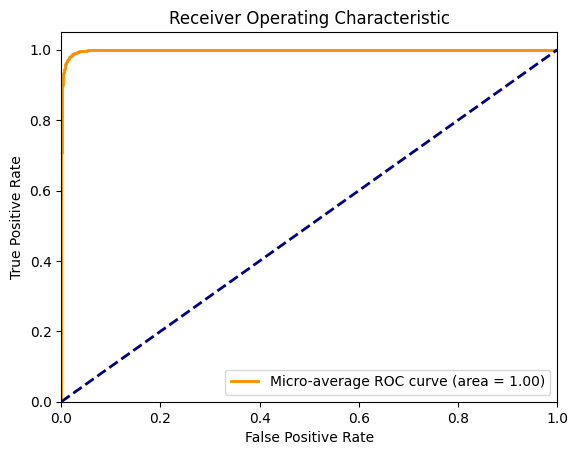

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np

# Get the prediction probabilities of the model on the test data
y_pred_probs = model_tcn.predict(X_test_np)

# Convert the test labels to categorical format
y_test_cat = to_categorical(y_test_np)

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_cat.ravel(), y_pred_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Calculate the predicted classes
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test_np, y_pred_classes)
precision = precision_score(y_test_np, y_pred_classes, average='micro')
recall = recall_score(y_test_np, y_pred_classes, average='micro')
f1 = f1_score(y_test_np, y_pred_classes, average='micro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plot the ROC curve
plt.figure()
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2, label='Micro-average ROC curve (area = %0.2f)' % roc_auc_micro)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# MLP


In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import time
import os
from keras.optimizers import Adam

# Load your CSV file
# df = df_train_red
# %cd /content/parking-spot-detector-1/train
# %cd /content/PKLot-2/train
# # Create a data generator
# datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# # Prepare iterators
# train_it = datagen.flow_from_dataframe(df_train, directory='.', x_col='filename', y_col=df.columns[1:], class_mode='raw', target_size=(220,220), batch_size=150, subset='training')
# val_it = datagen.flow_from_dataframe(df_train, directory='.', x_col='filename', y_col=df.columns[1:], class_mode='raw', target_size=(220, 220), batch_size=150, subset='validation')

model_mlp = Sequential([
    keras.layers.Flatten(input_shape=(120, 120, 3)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model_mlp.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# test_it = datagen.flow_from_dataframe(df_test, directory='.', x_col='filename', y_col=df.columns[1:], class_mode='raw', target_size=(220, 220), batch_size=300)
# Define a simple CNN model
# model_tcn = Sequential()
# model_tcn.add(Conv2D(32, (3, 3), input_shape=(220, 220, 3)))
# model_tcn.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))

# model_tcn.add(Conv2D(32, (3, 3), strides=(2,2)))
# model_tcn.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))

# model_tcn.add(Conv2D(64, (3, 3), strides=(2,2)))
# model_tcn.add(Activation('selu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))

# model_tcn.add(Conv2D(128, (3, 3), strides=(2,2)))
# model_tcn.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))

# model_tcn.add(Conv2D(128, (3, 3)))
# model_tcn.add(Activation('elu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))

# model_tcn.add(Conv2D(64, (3, 3)))
# model_tcn.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))

# model_tcn.add(Conv2D(32, (3, 3)))
# model_tcn.add(Activation('elu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# model_tcn.add(Reshape(target_shape=(20, 20 * 32)))
# model_tcn.add(TCN(return_sequences=False, activation='relu'))
# model_tcn.add(Flatten())
# model_tcn.add(Dense(64))
# model_tcn.add(Activation('relu'))
# # model.add(Dropout(0.5))
# model_tcn.add(Dense(len(df.columns[1:])))
# model_tcn.add(Activation('sigmoid'))

early_stopping = EarlyStopping(monitor='accuracy', patience=4)

# # Compile the model
# model_tcn.compile(loss='binary_crossentropy',
#               optimizer=Adam(learning_rate=0.01),
#               metrics=['accuracy'])

# Train the model
from time import time
start_time = time()
model_mlp.fit(X_train_np, y_train_np, epochs=1000,
              callbacks=[early_stopping])
mlp_time = time() - start_time

Epoch 1/1000
272/272 [==============================] - 2s 3ms/step - loss: 9.7855 - accuracy: 0.4682
Epoch 2/1000
272/272 [==============================] - 1s 3ms/step - loss: 2.1217 - accuracy: 0.7102
Epoch 3/1000
272/272 [==============================] - 1s 3ms/step - loss: 1.7066 - accuracy: 0.7473
Epoch 4/1000
272/272 [==============================] - 1s 3ms/step - loss: 1.3078 - accuracy: 0.7817
Epoch 5/1000
272/272 [==============================] - 1s 3ms/step - loss: 1.1019 - accuracy: 0.8081
Epoch 6/1000
272/272 [==============================] - 1s 3ms/step - loss: 0.8633 - accuracy: 0.8208
Epoch 7/1000
272/272 [==============================] - 1s 3ms/step - loss: 0.9652 - accuracy: 0.8162
Epoch 8/1000
272/272 [==============================] - 1s 3ms/step - loss: 0.7966 - accuracy: 0.8352
Epoch 9/1000
272/272 [==============================] - 1s 3ms/step - loss: 0.7663 - accuracy: 0.8420
Epoch 10/1000
272/272 [==============================] - 1s 3ms/step - loss: 0.700

In [ ]:
print(mlp_time)

32.4896137714386


In [ ]:
# # Prepare test iterator
# %cd /content/PKLot-2/test
# datagen_test = ImageDataGenerator(rescale=1./255)
# test_it = datagen_test.flow_from_dataframe(df_test, directory='.', x_col='filename', y_col=df_test.columns[1:], class_mode='raw', target_size=(220, 220), batch_size=300)


/content/PKLot-2/test
Found 1242 validated image filenames.


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model_mlp.evaluate(X_test_np,y_test_np)

print(f'Test loss: {loss:.2f}')
print(f'Test accuracy: {accuracy*100:.2f}%')

55/55 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9264
Test loss: 0.18
Test accuracy: 92.64%


In [ ]:
%cd /content/
model_tcn.save('Parking_Space_cnn_mlp.keras')

/content


55/55 [==============================] - 0s 2ms/step
Accuracy: 0.926394479585969
Precision: 0.926394479585969
Recall: 0.926394479585969
F1 Score: 0.926394479585969


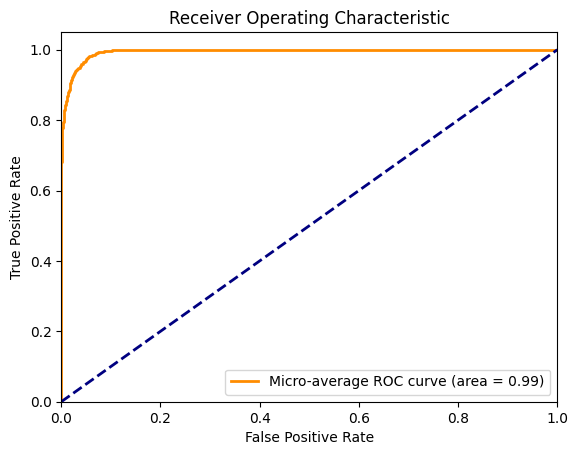

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np

# Get the prediction probabilities of the model on the test data
y_pred_probs = model_mlp.predict(X_test_np)

# Convert the test labels to categorical format
y_test_cat = to_categorical(y_test_np)

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_cat.ravel(), y_pred_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Calculate the predicted classes
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test_np, y_pred_classes)
precision = precision_score(y_test_np, y_pred_classes, average='micro')
recall = recall_score(y_test_np, y_pred_classes, average='micro')
f1 = f1_score(y_test_np, y_pred_classes, average='micro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plot the ROC curve
plt.figure()
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2, label='Micro-average ROC curve (area = %0.2f)' % roc_auc_micro)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
